In [1]:
# Import Python libraries using standard naming conventions. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
#import seaborn as sns
#import statsmodels as sm

In [2]:
# Read data from two csv files into two DataFrames.
supp_data_1 = pd.read_csv('data/supplementary-data-1.csv', sep=',', skiprows=18)
supp_data_2 = pd.read_csv('data/supplementary-data-2.csv', sep=',', skiprows=27)

In [3]:
supp_data_1.columns

Index(['depth_top (m)', 'depth_bott (m)', 'depth_mid (m)',
       'ageGICC05ext_top (yr BP)', 'ageGICC05ext_bott (yr BP)',
       'ageGICC05_mid (yr BP)', 'NH4 (ng/g)', 'NO3 (ng/g)', 'Na (ng/g)',
       'Ca (ng/g)', 'SO4 (ng/g)'],
      dtype='object')

In [4]:
supp_data_2.columns

Index(['depth_top (m)', 'depth_bott (m)', 'depth_mid (m)',
       'ageGICC05ext_top (yr BP)', 'ageGICC05ext_bott (yr BP)',
       'ageGICC05_mid (yr BP)', 'NH4source (ng/m3)',
       'NH4source+1sigma (ng/m3)', 'NH4source-1sigma (ng/m3)',
       'NH4 atm. residence time (days)', 'Nasource (ng/m3)',
       'Nasource+1sigma (ng/m3)', 'Nasource-1sigma (ng/m3)',
       'Na atm. residence time (days)', 'Casource (ng/m3)',
       'Casource+1sigma (ng/m3)', 'Casource-1sigma (ng/m3)',
       'Ca atm. residence time (days)'],
      dtype='object')

In [5]:
# Add column for age in kyr to each DataFrame.
supp_data_1['age_kyr'] = supp_data_1['ageGICC05_mid (yr BP)'] / 1000
supp_data_2['age_kyr'] = supp_data_2['ageGICC05_mid (yr BP)'] / 1000

In [6]:
supp_data_1.loc[supp_data_1['depth_mid (m)'] >= 1700, 'ageGICC05_mid (yr BP)']

2630      33490.0091
2631      33500.0082
2632      33509.9918
2633      33519.9707
2634      33529.9916
2635      33540.0164
2636      33549.9583
2637      33559.9637
2638      33570.0182
2639      33580.0182
2640      33590.0606
2641      33600.0534
2642      33610.0109
2643      33620.0091
2644      33630.1167
2645      33640.1135
2646      33650.0027
2647      33659.7308
2648      33669.7249
2649      33679.9964
2650      33689.9891
2651      33699.9818
2652      33709.9562
2653      33719.9626
2654      33729.9982
2655      33740.0127
2656      33750.0273
2657      33760.0300
2658      33769.9995
2659      33779.9845
            ...     
11416    128329.9581
11417    128339.9481
11418    128349.9873
11419    128360.0048
11420    128370.0100
11421    128379.9783
11422    128389.9758
11423    128400.0350
11424    128410.0237
11425    128420.0025
11426    128430.0113
11427    128439.9988
11428    128450.0245
11429    128460.0282
11430    128469.9938
11431    128480.0159
11432    1284

In [7]:
supp_data_1.loc[supp_data_1['depth_mid (m)'] >= 1700, 'ageGICC05_mid (yr BP)'].min()

33490.0091

In [8]:
neem_depth_labels = [1000, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2400]
supp_data_1.loc[supp_data_1['depth_mid (m)'] >= 1700, 'ageGICC05_mid (yr BP)'].min()
depth_to_kyr = lambda d: supp_data_1.loc[supp_data_1['depth_mid (m)'] >= d, 'ageGICC05_mid (yr BP)'].min()
ax_top_xticks = [depth_to_kyr(d) for d in neem_depth_labels]
ax_top_xticks

[7189.9559,
 15449.9691,
 23480.05,
 33490.0091,
 42430.05,
 53040.0041,
 70609.9891,
 86520.025,
 107969.9924,
 123309.9824]

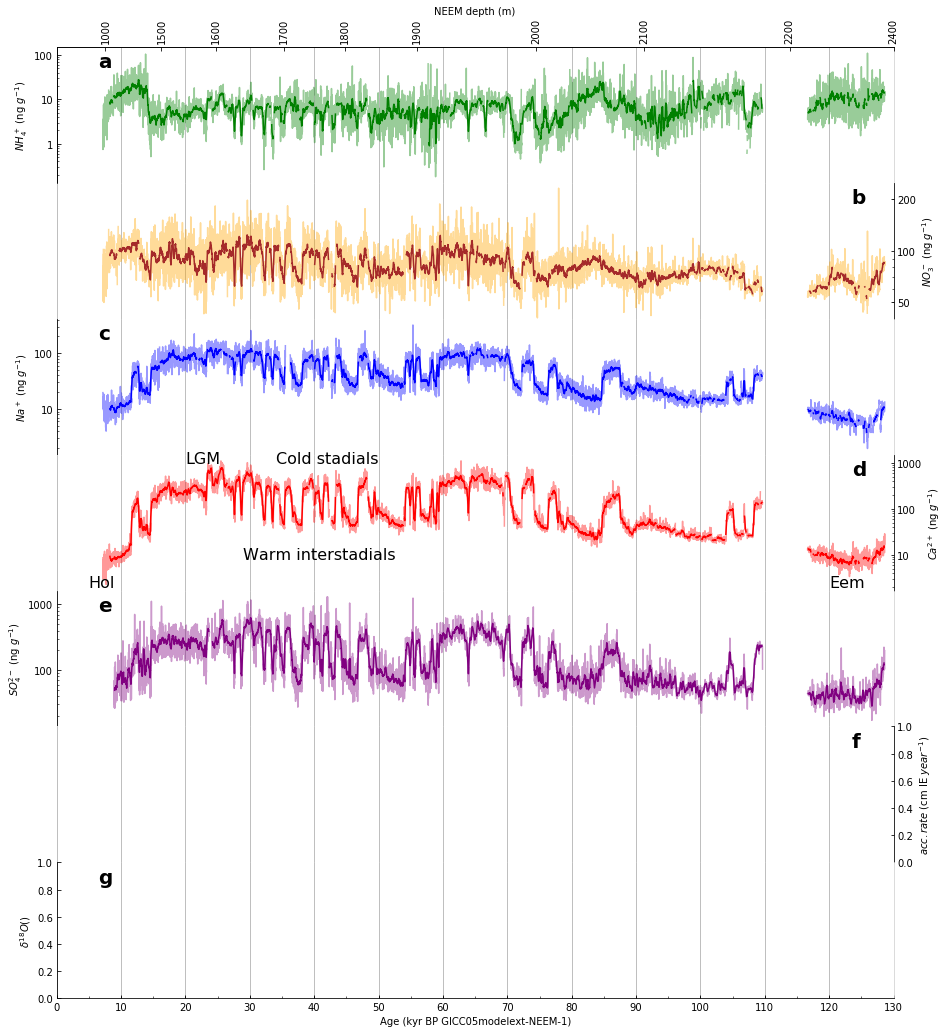

In [9]:
# TO DO: subplots f, g
#        NEEM depth axis disagrees with published figure (same prob in Fig 2)

# Figure 1
# Create a new figure with seven subplots.
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(15,17.5))
fig.subplots_adjust(hspace=0)

# Draw an x-axis using an alternate scale (depth) along top of figure.
ax_top = axes[0].twiny()
ax_top.set_xlabel('NEEM depth (m)')
ax_top.xaxis.set_label_position('top')
ax_top.tick_params(top=True)
neem_depth_labels = [1000, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2400]
supp_data_1.loc[supp_data_1['depth_mid (m)'] >= 1700, 'ageGICC05_mid (yr BP)'].min()
depth_to_kyr = lambda d: supp_data_1.loc[supp_data_1['depth_mid (m)'] >= d, 'ageGICC05_mid (yr BP)'].min()
ax_top_xticks = [depth_to_kyr(d) for d in neem_depth_labels]
ax_top.set_xticks(ax_top_xticks)
ax_top.set_xticklabels(neem_depth_labels, rotation=90)

# Draw all tick marks inside the plot area.
for i in range(7):
    axes[i].tick_params(which='both', direction='in')
ax_top.tick_params(direction='in')

# Use log scale for y-axis in subplots a-e, but don't use exponential format for y-axis labels.
for i in range(5):
    axes[i].set_yscale('log')
    axes[i].yaxis.set_major_formatter(ticker.ScalarFormatter())

# The 2nd, 4th, and 6th plots have y-axis labels and tick marks on the right.
for i in [1, 3, 5]:
    axes[i].yaxis.set_label_position('right')
    axes[i].tick_params(which='both', left=False, right=True, labelleft=False, labelright=True)

# Remove lines that don't appear in Figure 1 as published in Nature.
for i in [1, 3, 5]:
    axes[i].spines['left'].set_visible(False)
for i in range(6):
    axes[i].spines['bottom'].set_visible(False)
for i in range(1, 7):
    axes[i].spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
    
# Subplots 1a-e.
# Plot data using a lighter shade (by setting alpha=0.4).
supp_data_1.plot(ax=axes[0], x='age_kyr', y='NH4 (ng/g)', color='green', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[1], x='age_kyr', y='NO3 (ng/g)', color='orange', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[2], x='age_kyr', y='Na (ng/g)', color='blue', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[3], x='age_kyr', y='Ca (ng/g)', color='red', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[4], x='age_kyr', y='SO4 (ng/g)', color='purple', alpha=0.4, legend=False)

# Calculate the smoothed function. Use min_periods to remove the extraneous "mean"
# where the actual data is "NaN".
supp_data_1_smoothed = supp_data_1.rolling(21, min_periods=21, center=True)
supp_data_1_rolling_mean = supp_data_1_smoothed.mean()

# Plot the 21 point running means of the 10 year data.
supp_data_1_rolling_mean.plot(ax=axes[0], x='age_kyr', y='NH4 (ng/g)', color='green', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[1], x='age_kyr', y='NO3 (ng/g)', color='brown', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[2], x='age_kyr', y='Na (ng/g)', color='blue', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[3], x='age_kyr', y='Ca (ng/g)', color='red', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[4], x='age_kyr', y='SO4 (ng/g)', color='purple', legend=False)

# Draw vertical gridlines.
for i in range(7):
    axes[i].xaxis.grid(which='major')
for i in [0, 2, 4, 6]:
    axes[i].spines['right'].set_color('lightgrey')
    
# Annotate the figure.
axes[0].annotate('a', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[1].annotate('b', xy=(0.95, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[2].annotate('c', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[3].annotate('d', xy=(0.95, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[4].annotate('e', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[5].annotate('f', xy=(0.95, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[6].annotate('g', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')

axes[3].annotate('Hol', xy=(5, 2), xycoords='data', fontsize=16)
axes[3].annotate('LGM', xy=(20, 1000), xycoords='data', fontsize=16)
axes[3].annotate('Cold stadials', xy=(34, 1000), xycoords='data', fontsize=16)
axes[3].annotate('Warm interstadials', xy=(29, 8), xycoords='data', fontsize=16)
axes[3].annotate('Eem', xy=(120, 2), xycoords='data', fontsize=16)

# Set labels directly on the axes objects.
# Matplotlib includes a subset of latex.
# See https://matplotlib.org/users/mathtext.html for documentation.
axes[0].set_ylabel(r'$NH_4^+$ (ng $g^{-1}$)')
axes[1].set_ylabel(r'$NO_3^-$ (ng $g^{-1}$)')
axes[2].set_ylabel(r'$Na^+$ (ng $g^{-1}$)')
axes[3].set_ylabel(r'$Ca^{2+}$ (ng $g^{-1}$)')
axes[4].set_ylabel(r'$SO_4^{2-}$ (ng $g^{-1}$)')
axes[5].set_ylabel(r'$acc.rate$ (cm IE $year^{-1}$)')
axes[6].set_ylabel(r'$\delta^{18}O ()$')

axes[6].set_xlabel('Age (kyr BP GICC05modelext-NEEM-1)')

# Set x-axis ticks (default ticks were drawn every 20 kyr).
NUM_XTICKS = 14
axes[6].set_xlim(0, 130)
axes[6].xaxis.set_major_locator(ticker.LinearLocator(NUM_XTICKS))
axes[6].xaxis.set_minor_locator(ticker.LinearLocator(2 * NUM_XTICKS - 1))

# Only the bottommost plot has tick marks on the x-axis.
for i in range(6):
    axes[i].tick_params(axis='x', which='both', bottom=False)
    
# Tweak y-axis settings for subplot b.
axes[1].set_ylim(40, 250)
axes[1].set_yticks([50, 100, 200])
axes[1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
axes[1].get_yaxis().set_minor_formatter(ticker.NullFormatter())

Text(120,2,'Eem')

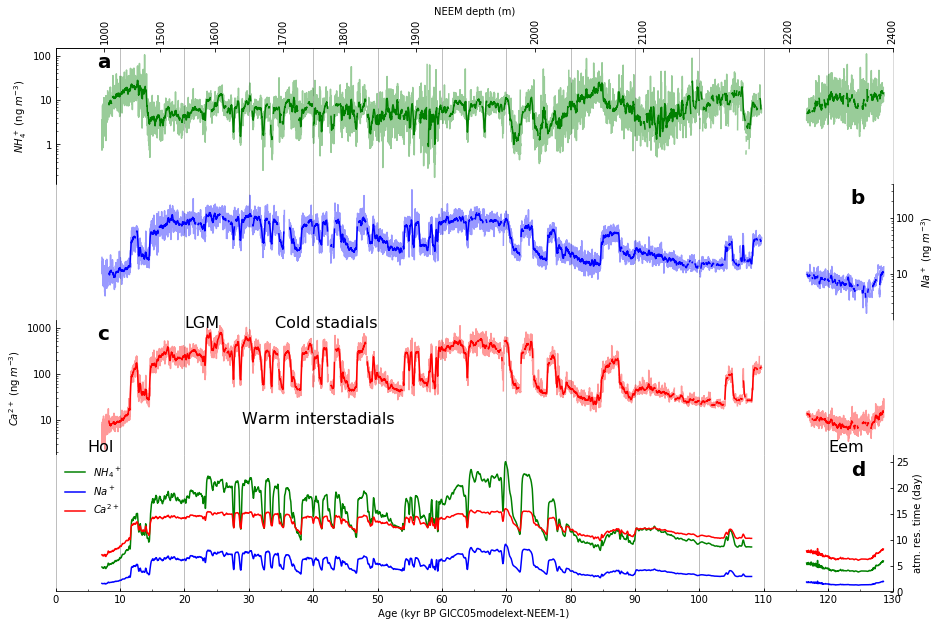

In [10]:
# TO DO: plot gray area in subplots a-c (how to calculate?)
#        NEEM depth axis disagrees with published figure (same prob in Fig 1)

# Figure 2
# Create a new figure with four subplots.
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15,10))
fig.subplots_adjust(hspace=0)

# Draw an x-axis using an alternate scale (depth) along top of figure.
ax_top = axes[0].twiny()
ax_top.set_xlabel('NEEM depth (m)')
ax_top.xaxis.set_label_position('top')
ax_top.tick_params(top=True)
neem_depth_labels = [1000, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2400]
supp_data_1.loc[supp_data_1['depth_mid (m)'] >= 1700, 'ageGICC05_mid (yr BP)'].min()
depth_to_kyr = lambda d: supp_data_1.loc[supp_data_1['depth_mid (m)'] >= d, 'ageGICC05_mid (yr BP)'].min()
ax_top_xticks = [depth_to_kyr(d) for d in neem_depth_labels]
ax_top.set_xticks(ax_top_xticks)
ax_top.set_xticklabels(neem_depth_labels, rotation=90)

# Draw all tick marks inside the plot area.
for i in range(4):
    axes[i].tick_params(which='both', direction='in')
ax_top.tick_params(direction='in')

# Use log scale for y-axis in subplots a-c, but don't use exponential format for y-axis labels.
for i in range(3):
    axes[i].set_yscale('log')
    axes[i].yaxis.set_major_formatter(ticker.ScalarFormatter())

# The 2nd and 4th plots have y-axis labels and tick marks on the right.
for i in [1, 3]:
    axes[i].yaxis.set_label_position('right')
    axes[i].tick_params(which='both', left=False, right=True, labelleft=False, labelright=True)

# Remove lines that don't appear in Figure 2 as published in Nature.
for i in [1, 3]:
    axes[i].spines['left'].set_visible(False)
for i in [0, 1, 2]:
    axes[i].spines['bottom'].set_visible(False)
for i in [1, 2, 3]:
    axes[i].spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)

# Subplots 2a, 2b, and 2c.
# Plot data using a lighter shade (by setting alpha=0.4).
supp_data_1.plot(ax=axes[0], x='age_kyr', y='NH4 (ng/g)', color='green', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[1], x='age_kyr', y='Na (ng/g)', color='blue', alpha=0.4, legend=False)
supp_data_1.plot(ax=axes[2], x='age_kyr', y='Ca (ng/g)', color='red', alpha=0.4, legend=False)

# Calculate and plot the smoothed function values using a darker line.
# Use min_periods to remove extraneous "mean" values when the actual data
# is "NaN".
supp_data_1_smoothed = supp_data_1.rolling(21, min_periods=21, center=True)
supp_data_1_rolling_mean = supp_data_1_smoothed.mean()

# Plot the 21 point running means of the 10 year data.
supp_data_1_rolling_mean.plot(ax=axes[0], x='age_kyr', y='NH4 (ng/g)', color='green', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[1], x='age_kyr', y='Na (ng/g)', color='blue', legend=False)
supp_data_1_rolling_mean.plot(ax=axes[2], x='age_kyr', y='Ca (ng/g)', color='red', legend=False)

# Subplot 2d.
supp_data_2.plot(ax=axes[3], x='age_kyr', y='NH4 atm. residence time (days)',
                 color='green', label='${NH_4}^+$')
supp_data_2.plot(ax=axes[3], x='age_kyr', y='Na atm. residence time (days)',
                 color='blue', label='$Na^+$')
supp_data_2.plot(ax=axes[3], x='age_kyr', y='Ca atm. residence time (days)',
                 color='red', label='$Ca^{2+}$')
axes[3].legend(loc='upper left', frameon=False)

# Draw vertical gridlines.
for i in range(4):
    axes[i].xaxis.grid(which='major')
for i in [0, 2]:
    axes[i].spines['right'].set_color('lightgrey')

# Set labels directly on the axes objects.
# Matplotlib includes a subset of latex.
# See https://matplotlib.org/users/mathtext.html for documentation.
axes[0].set_ylabel(r'$NH_4^+$ (ng $m^{-3}$)')
axes[1].set_ylabel(r'$Na^+$ (ng $m^{-3}$)', )
axes[2].set_ylabel(r'$Ca^{2+}$ (ng $m^{-3}$)')
axes[3].set_ylabel('atm. res. time (day)')

axes[3].set_xlabel('Age (kyr BP GICC05modelext-NEEM-1)')

# Set x-axis ticks (default ticks were drawn every 20 kyr).
NUM_XTICKS = 14
axes[3].set_xlim(0, 130)
axes[3].xaxis.set_major_locator(ticker.LinearLocator(NUM_XTICKS))
axes[3].xaxis.set_minor_locator(ticker.LinearLocator(2 * NUM_XTICKS - 1))

# Only the bottommost plot has tick marks on the x-axis.
for i in range(3):
    axes[i].tick_params(axis='x', which='both', bottom=False)
    
# Annotate the figure.
axes[0].annotate('a', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[1].annotate('b', xy=(0.95, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[2].annotate('c', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
axes[3].annotate('d', xy=(0.95, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')

axes[2].annotate('Hol', xy=(5, 2), xycoords='data', fontsize=16)
axes[2].annotate('LGM', xy=(20, 1000), xycoords='data', fontsize=16)
axes[2].annotate('Cold stadials', xy=(34, 1000), xycoords='data', fontsize=16)
axes[2].annotate('Warm interstadials', xy=(29, 8), xycoords='data', fontsize=16)
axes[2].annotate('Eem', xy=(120, 2), xycoords='data', fontsize=16)

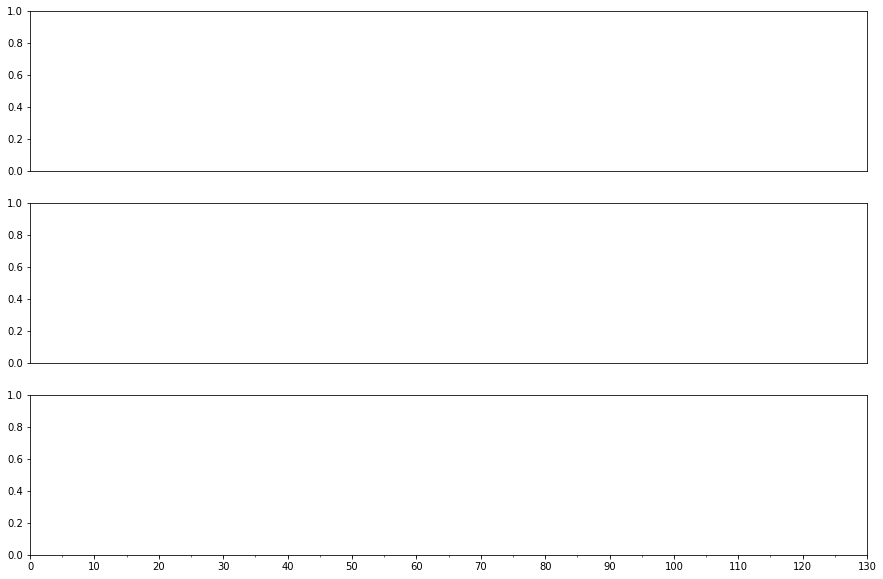

In [11]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,10))

NUM_XTICKS = 14
axes[2].set_xlim(0, 130)
axes[2].xaxis.set_major_locator(ticker.LinearLocator(NUM_XTICKS))
axes[2].xaxis.set_minor_locator(ticker.LinearLocator(2 * NUM_XTICKS - 1))

for i in range(2):
    axes[i].tick_params(axis='x', which='both', bottom=False)

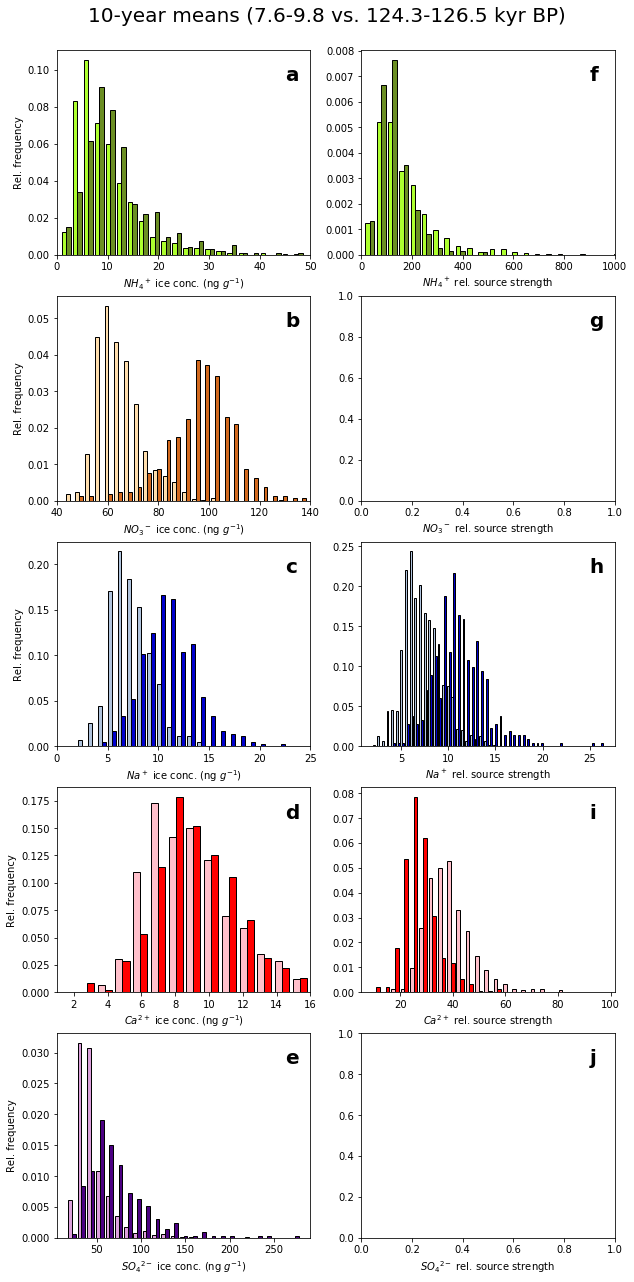

In [12]:
# TO DO: appear to have plotted the wrong values
#        subplot e disagrees with published figure (wrong data?)
#        number of bins to use?
#        plotted density, but density != relative freq?
#        subplots f-j: wrong or missing data?
# Please see comments written in ALL CAPS in the code below
# for pointers to the problems.

# Figure 3
# Create a new figure with ten subplots. An adjustment is necessary to
# eliminate a vertical gap between the title and subplots.
fig, axes = plt.subplots(5, 2, figsize=(10,20))
fig.suptitle('10-year means (7.6-9.8 vs. 124.3-126.5 kyr BP)', fontsize=20)
fig.subplots_adjust(top=0.95)

# Set labels directly on the axes objects.
# Matplotlib includes a subset of latex.
# See https://matplotlib.org/users/mathtext.html for documentation.
axes[0][0].set_xlabel('${NH_4}^+$ ice conc. (ng $g^{-1}$)')
axes[1][0].set_xlabel('${NO_3}^-$ ice conc. (ng $g^{-1}$)')
axes[2][0].set_xlabel('${Na}^+$ ice conc. (ng $g^{-1}$)')
axes[3][0].set_xlabel('${Ca}^{2+}$ ice conc. (ng $g^{-1}$)')
axes[4][0].set_xlabel('${SO_4}^{2-}$ ice conc. (ng $g^{-1}$)')

axes[0][1].set_xlabel('${NH_4}^+$ rel. source strength')
axes[1][1].set_xlabel('${NO_3}^-$ rel. source strength')
axes[2][1].set_xlabel('${Na}^+$ rel. source strength')
axes[3][1].set_xlabel('${Ca}^{2+}$ rel. source strength')
axes[4][1].set_xlabel('${SO_4}^{2-}$ rel. source strength')

for i in range(5):
    axes[i][0].set_ylabel('Rel. frequency')

# The Holocene (current geological epoch) began about 11,650 cal years BP,
# where BP is (in standard practice) defined to be 1 January 1950.
# Source: https://en.wikipedia.org/wiki/Holocene
#         https://en.wikipedia.org/wiki/Before_Present
#hol_data_1 = supp_data_1[supp_data_1.age_kyr <= 11.65]

# The Eemian (last interglacial period) began about 130,000 years ago and
# ended about 115,000 years ago.
# Source: https://en.wikipedia.org/wiki/Eemian
#eem_data_1 = supp_data_1[(supp_data_1.age_kyr >= 115) & (supp_data_1.age_kyr <= 130)]

# Dates selected based on the title of the published figure
# (instead of the dates in the comments above). 
hol_data_1 = supp_data_1[(supp_data_1.age_kyr >= 7.6) & (supp_data_1.age_kyr <= 9.8)]
hol_data_2 = supp_data_2[(supp_data_2.age_kyr >= 7.6) & (supp_data_2.age_kyr <= 9.8)]
eem_data_1 = supp_data_1[(supp_data_1.age_kyr >= 124.3) & (supp_data_1.age_kyr <= 126.5)]
eem_data_2 = supp_data_2[(supp_data_2.age_kyr >= 124.3) & (supp_data_2.age_kyr <= 126.5)]

# Lighter colors represent the Eemian reference period, and darker colors
# represent the early Holocene.
nh4_colors = ['greenyellow', 'olivedrab']
no3_colors = ['navajowhite', 'chocolate']
na_colors = ['lightsteelblue', 'mediumblue']
ca2_colors = ['pink', 'red']
so4_colors = ['plum', 'indigo']

# Subplot a. NBINS? REL FREQ?
eem_data_nh4 = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                           (supp_data_1.age_kyr <= 130)]['NH4 (ng/g)']
hol_data_nh4 = supp_data_1[supp_data_1.age_kyr <= 11.65]['NH4 (ng/g)']
nh4 = [eem_data_nh4.dropna(), hol_data_nh4.dropna()]
axes[0][0].hist(nh4, 50, histtype='bar', color=nh4_colors, edgecolor='k', density=True)
axes[0][0].set_xlim(0, 50)

# Subplot b. NBINS? REL FREQ?
eem_data_no3 = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                           (supp_data_1.age_kyr <= 130)]['NO3 (ng/g)']
hol_data_no3 = supp_data_1[supp_data_1.age_kyr <= 11.65]['NO3 (ng/g)']
no3 = [eem_data_no3.dropna(), hol_data_no3.dropna()]
axes[1][0].hist(no3, 25, histtype='bar', color=no3_colors, edgecolor='k', density=True)
axes[1][0].set_xlim(40, 140)

# Subplot c. NBINS? REL FREQ?
eem_data_na = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                          (supp_data_1.age_kyr <= 130)]['Na (ng/g)']
hol_data_na = supp_data_1[supp_data_1.age_kyr <= 11.65]['Na (ng/g)']
na = [eem_data_na.dropna(), hol_data_na.dropna()]
axes[2][0].hist(na, 25, histtype='bar', color=na_colors, edgecolor='k', density=True)
axes[2][0].set_xlim(0, 25)

# Subplot d. NBINS? REL FREQ?
eem_data_ca2 = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                           (supp_data_1.age_kyr <= 130)]['Ca (ng/g)']
hol_data_ca2 = supp_data_1[supp_data_1.age_kyr <= 11.65]['Ca (ng/g)']
ca2 = [eem_data_ca2.dropna(), hol_data_ca2.dropna()]
axes[3][0].hist(ca2, 25, histtype='bar', color=ca2_colors, edgecolor='k', density=True)
axes[3][0].set_xlim(1, 16)

# Subplot e. NBINS? REL FREQ? WRONG DATA?
eem_data_so4 = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                           (supp_data_1.age_kyr <= 130)]['SO4 (ng/g)']
hol_data_so4 = supp_data_1[supp_data_1.age_kyr <= 11.65]['SO4 (ng/g)']
so4 = [eem_data_so4.dropna(), hol_data_so4.dropna()]
axes[4][0].hist(so4, 25, histtype='bar', color=so4_colors, edgecolor='k', density=True)

# Subplot f. WRONG DATA?
eem_data_nh4 = supp_data_2[(supp_data_2.age_kyr >= 115) & 
                           (supp_data_2.age_kyr <= 130)]['NH4source (ng/m3)']
hol_data_nh4 = supp_data_2[supp_data_2.age_kyr <= 11.65]['NH4source (ng/m3)']
nh4 = [eem_data_nh4.dropna(), hol_data_nh4.dropna()]
axes[0][1].hist(nh4, 50, histtype='bar', color=nh4_colors, edgecolor='k', density=True)
axes[0][1].set_xlim(0, 1000)

# Subplot g. MISSING DATA?

# Subplot h. WRONG DATA?
eem_data_na = supp_data_2[(supp_data_2.age_kyr >= 115) & 
                          (supp_data_2.age_kyr <= 130)]['Nasource (ng/m3)']
hol_data_na = supp_data_2[supp_data_2.age_kyr <= 11.65]['Nasource (ng/m3)']
nh4 = [eem_data_na.dropna(), hol_data_na.dropna()]
axes[2][1].hist(na, 50, histtype='bar', color=na_colors, edgecolor='k', density=True)
#axes[2][1].set_xlim(0, 500)

# Subplot i. WRONG DATA? 
eem_data_ca2 = supp_data_2[(supp_data_2.age_kyr >= 115) & 
                           (supp_data_2.age_kyr <= 130)]['Casource (ng/m3)']
hol_data_ca2 = supp_data_2[supp_data_2.age_kyr <= 11.65]['Casource (ng/m3)']
ca2 = [eem_data_ca2.dropna(), hol_data_ca2.dropna()]
axes[3][1].hist(ca2, 25, histtype='bar', color=ca2_colors, edgecolor='k', density=True)
#axes[3][1].set_xlim(1, 16)

# Subplot j. MISSING DATA?

# Annotate the figure.
for i, j, ch in [(0,0,'a'), (1,0,'b'), (2,0,'c'), (3,0,'d'), (4,0,'e'),
                 (0,1,'f'), (1,1,'g'), (2,1,'h'), (3,1,'i'), (4,1,'j')]:
    axes[i][j].annotate(ch, xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold') 

# Equivalent to the preceding for loop.
#axes[0][0].annotate('a', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[1][0].annotate('b', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[2][0].annotate('c', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[3][0].annotate('d', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[4][0].annotate('e', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')

#axes[0][1].annotate('f', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[1][1].annotate('g', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[2][1].annotate('h', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[3][1].annotate('i', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')
#axes[4][1].annotate('j', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=20, fontweight='bold')


(0, 50)

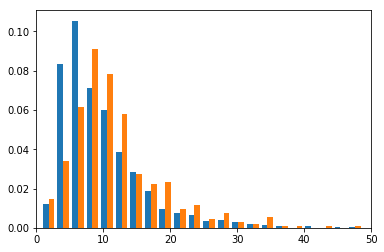

In [13]:
eem_data_nh4 = supp_data_1[(supp_data_1.age_kyr >= 115) & 
                           (supp_data_1.age_kyr <= 130)]['NH4 (ng/g)']
hol_data_nh4 = supp_data_1[supp_data_1.age_kyr <= 11.65]['NH4 (ng/g)']

nh4 = [eem_data_nh4.dropna(), hol_data_nh4.dropna()]
plt.hist(nh4, 50, histtype='bar', density=True)
plt.xlim(0, 50)

In [14]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
